In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/titanic_train.csv')
df2 = pd.read_csv('data/titanic_test.csv')

In [3]:
total_df = pd.concat([df1, df2])
total_df.reset_index(inplace=True, drop=True)

### 데이터 프레임 정보 확인

In [4]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


- 1309 entries : 행이 1309개
- object 컬럼이 존재

In [5]:
# 결측치 확인
total_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
# 학습 데이터 결측치 확인
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 예측 데이터에 대한 결측치
df2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 분석

### PassengerId
- 승객들에게 부여한 고유 번호
- 의미 없다.
- 제거

In [8]:
total_df.drop('PassengerId', axis=1, inplace=True)
total_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Survived
- 결과 데이터
- 0 : 사망, 1, 생존

### Pclass
- 객실 등급
- 1 : 1등급, 2 : 2등급, 3 : 3등급

In [9]:
# 결측치 확인
total_df['Pclass'].isna().sum()

0

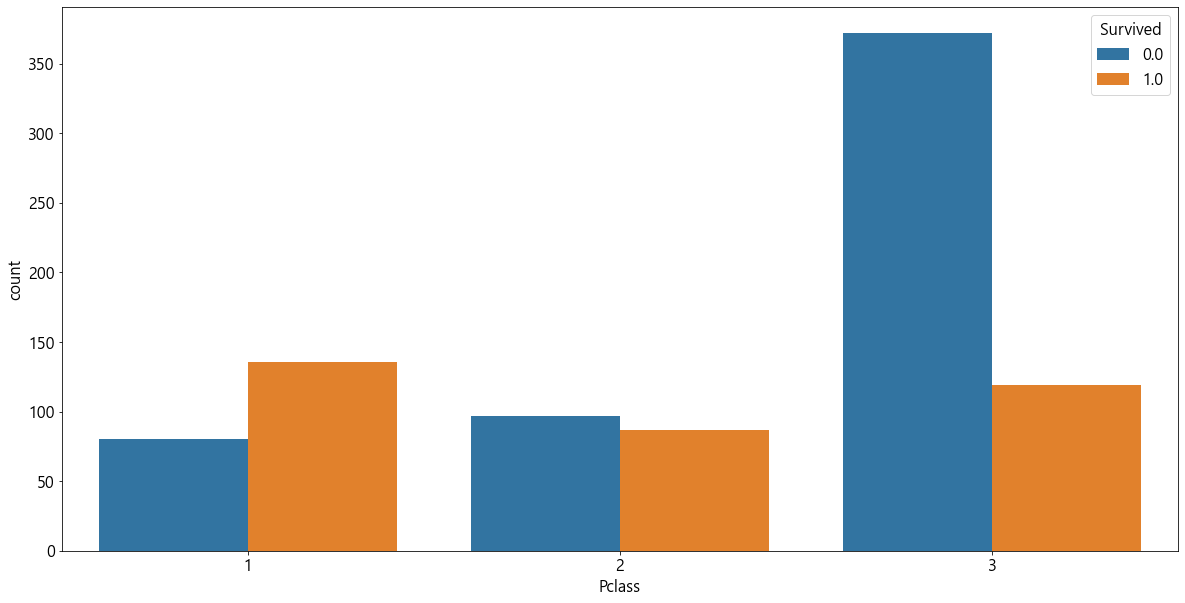

In [10]:
sns.countplot(data=total_df, x='Pclass', hue='Survived')
plt.show()

- 1등석은 생존 비율이 높고 3등석은 사망 비율이 높다.

### Name
- 승객 이름

In [11]:
total_df['Name'].isna().sum()

0

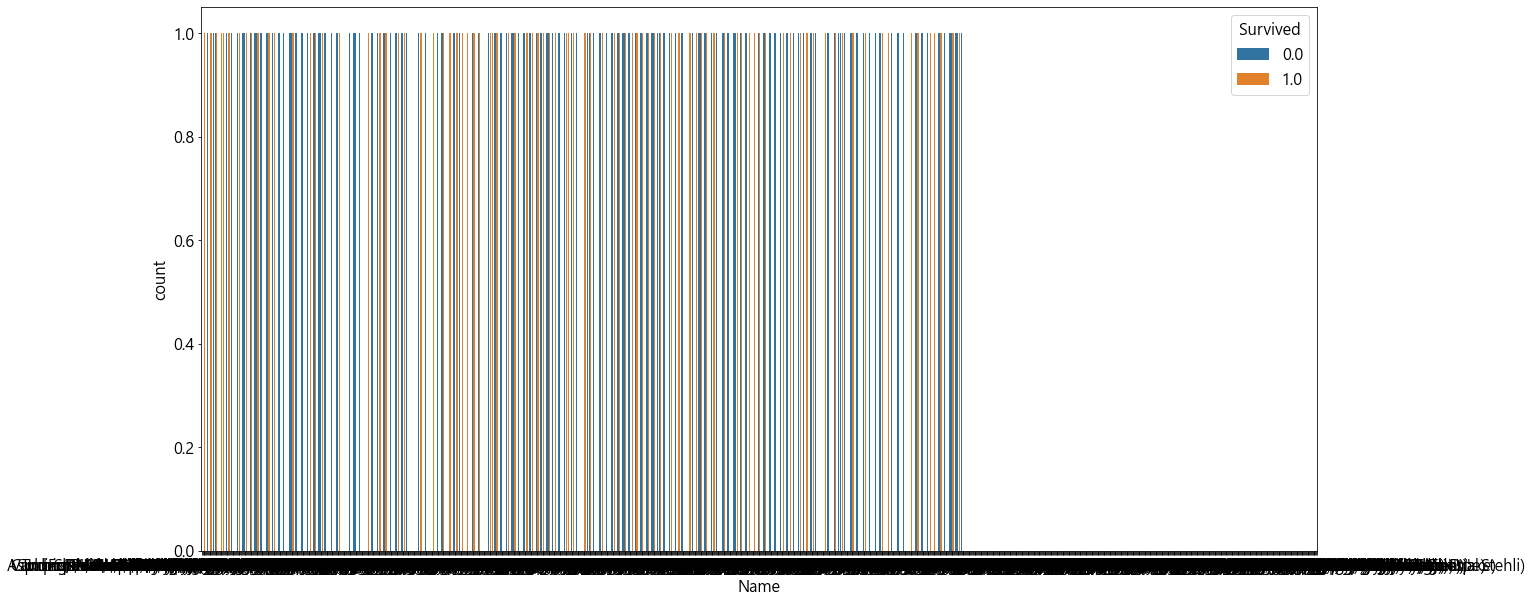

In [12]:
sns.countplot(data=total_df, x='Name', hue='Survived')
plt.show()

In [13]:
total_df['Name'].value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [14]:
# 이름을 쉼표를 기준으로 잘라낸다.
a1 = total_df['Name'].str.split(',')
a1

0                              [Braund,  Mr. Owen Harris]
1       [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                               [Heikkinen,  Miss. Laina]
3         [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                             [Allen,  Mr. William Henry]
                              ...                        
1304                                [Spector,  Mr. Woolf]
1305                      [Oliva y Ocana,  Dona. Fermina]
1306                      [Saether,  Mr. Simon Sivertsen]
1307                               [Ware,  Mr. Frederick]
1308                          [Peter,  Master. Michael J]
Name: Name, Length: 1309, dtype: object

In [15]:
# last_name을 추출해 리스트에 담고 데이터 프레임에 추가한다.
last_name = []

for a2 in a1 :
    last_name.append(a2[0].strip())
    
total_df['LastName'] = last_name

total_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware


In [16]:
name2 = []
first_name = []

for a2 in a1 :
    
    # 점을 기준으로 잘라낸다
    a3 = a2[1].split('.')
    
    name2.append(a3[0].strip())
    first_name.append(a3[1].strip())
    
total_df['name2'] = name2
total_df['FirstName'] = first_name

total_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,name2,FirstName
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


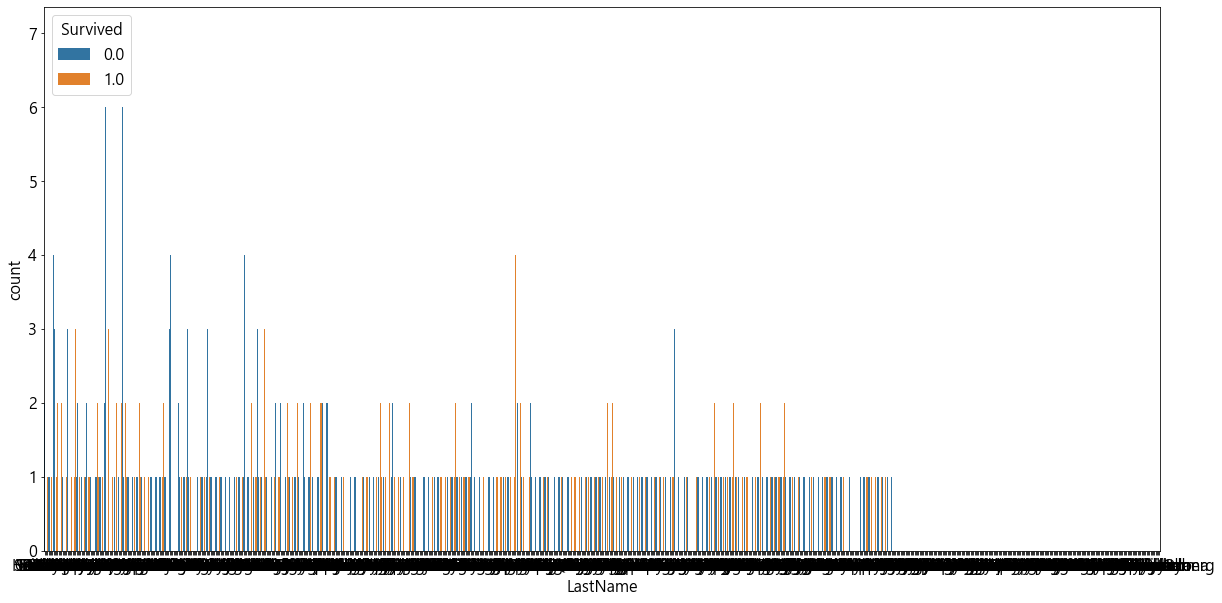

In [17]:
# LastName과 결과와의 관계
sns.countplot(data=total_df, x='LastName', hue='Survived')
plt.show()

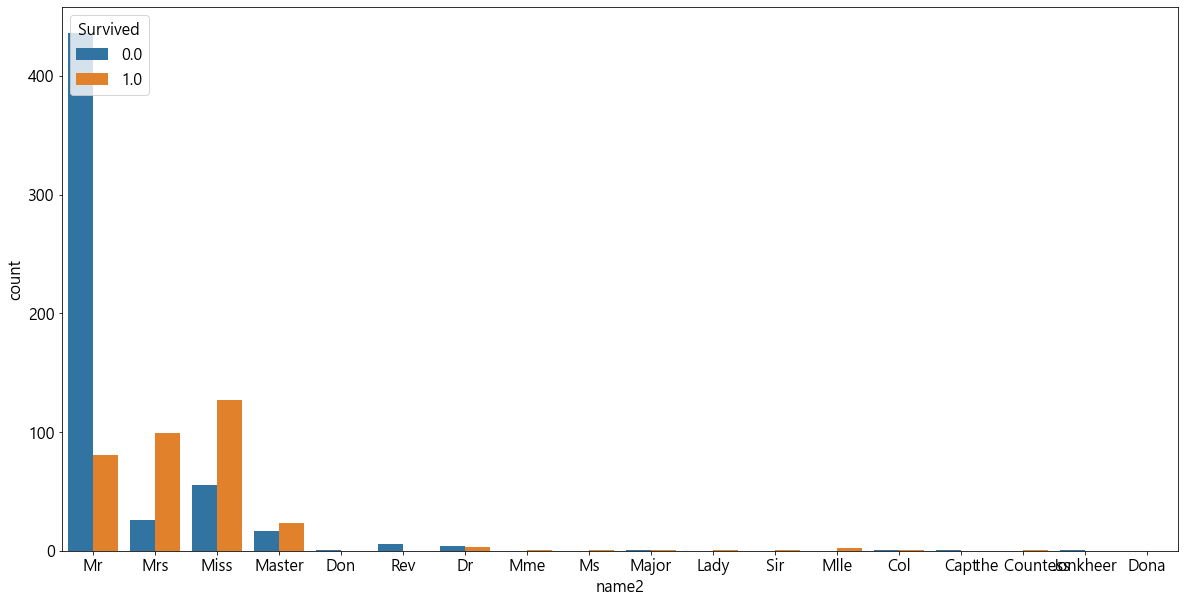

In [18]:
# Name2와 결과와의 관계
sns.countplot(data=total_df, x='name2', hue='Survived')
plt.show()

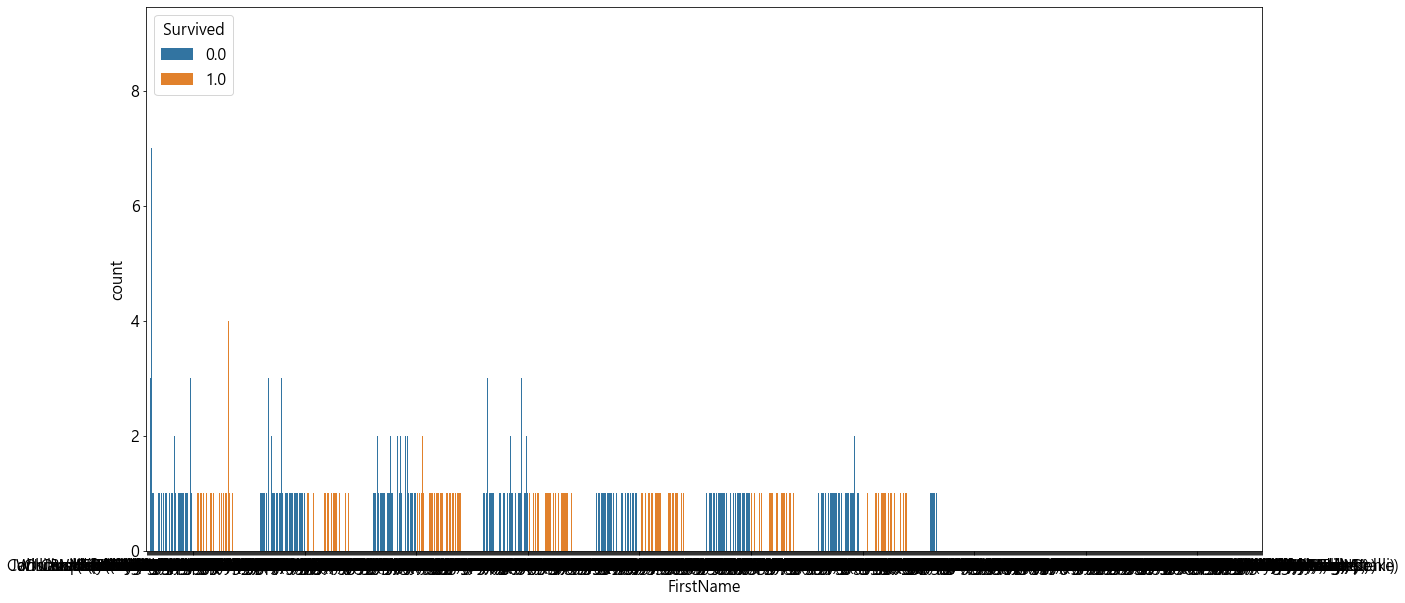

In [19]:
# FirstName 과와 결과와의 관계
sns.countplot(data=total_df, x='FirstName', hue='Survived')
plt.show()

- name2의 경우에는 Mr는 사망확률이 매우 높고 Miss, Mrs, Dr. 는 생존 비율이 높다.
- 나머지는 표본수가 너무 적다.
- LastName, FirstName의 일부는 같은 것이 존재하고 사망과 생존 비율이 각각 높은 것들이 존재한다.

In [20]:
# Name은 제거한다.
total_df.drop('Name', axis=1, inplace=True)
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,name2,FirstName
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,NaN,1,female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,NaN,3,male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


### Sex
- 성별
- male : 남성, femle : 여성

In [21]:
# 결측치 확인
total_df['Sex'].isna().sum()

0

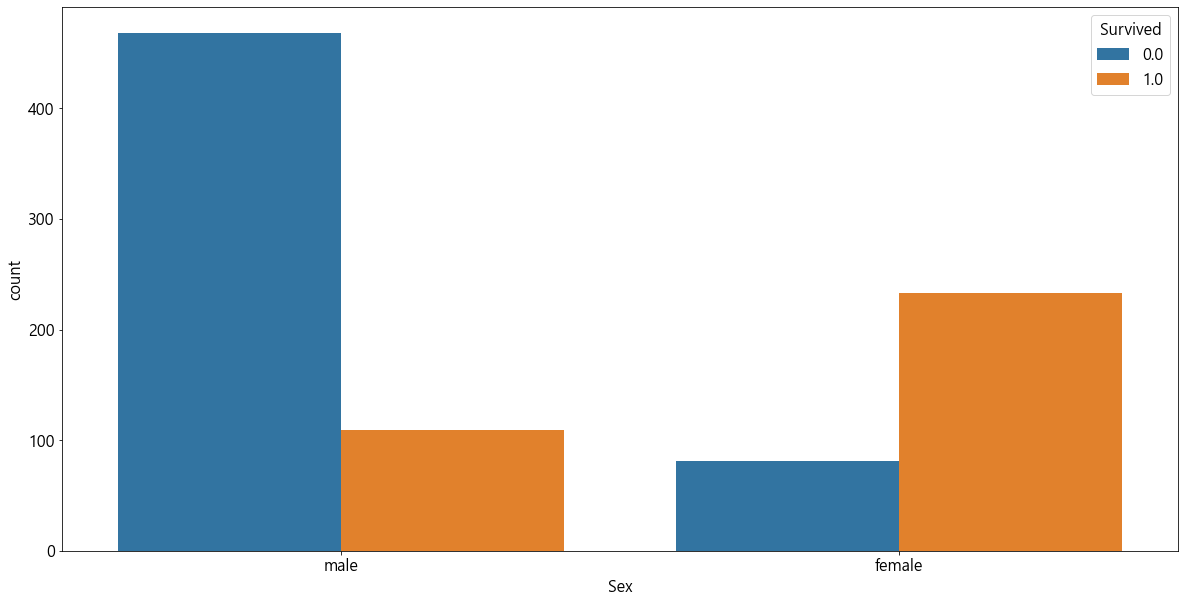

In [22]:
# 결과데이터와 확인한다.
sns.countplot(data=total_df, x='Sex', hue='Survived')
plt.show()

- 남성은 사망비율이 높고 여성은 생존비율이 높다.

### Age
- 나이

In [23]:
# 결측치 확인
total_df['Age'].isna().sum()

263

In [24]:
# 연령대 컬럼을 만든다.
total_df['Ages'] = total_df['Age'] // 10 * 10
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,name2,FirstName,Ages
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,20.0
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),30.0
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,20.0
3,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),30.0
4,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,NaN
1305,NaN,1,female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,30.0
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,30.0
1307,NaN,3,male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,NaN


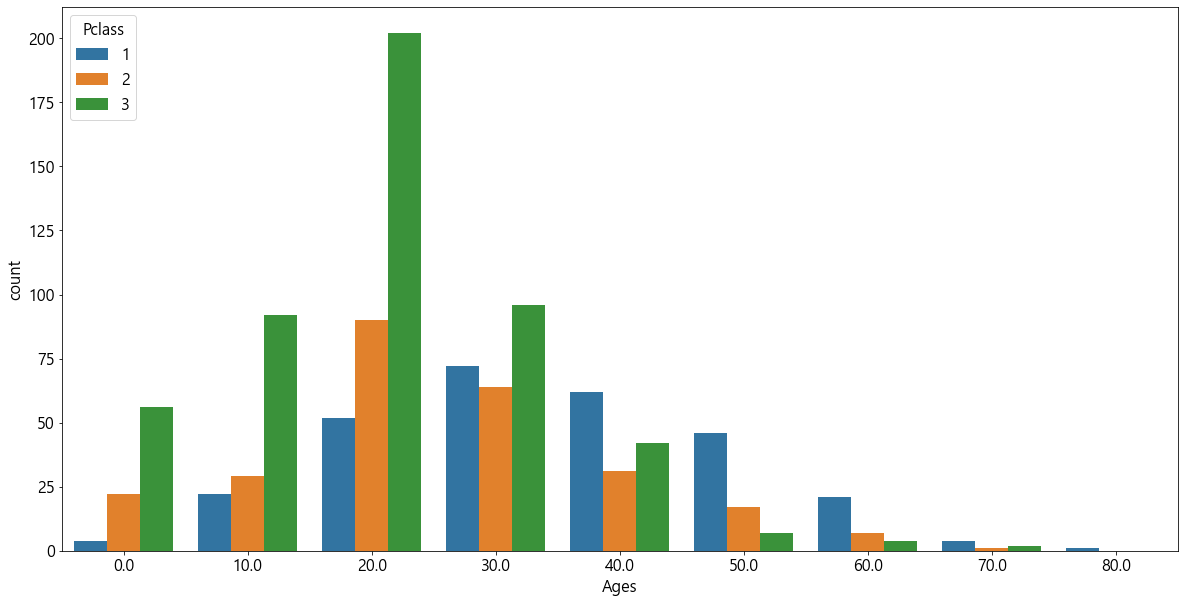

In [25]:
# Ages와 Pclass간의 관계
sns.countplot(data=total_df, x='Ages', hue='Pclass')
plt.show()

- 0세대 ~ 30대는 3등석이 많고
- 40대 이상은 1등석이 많다.

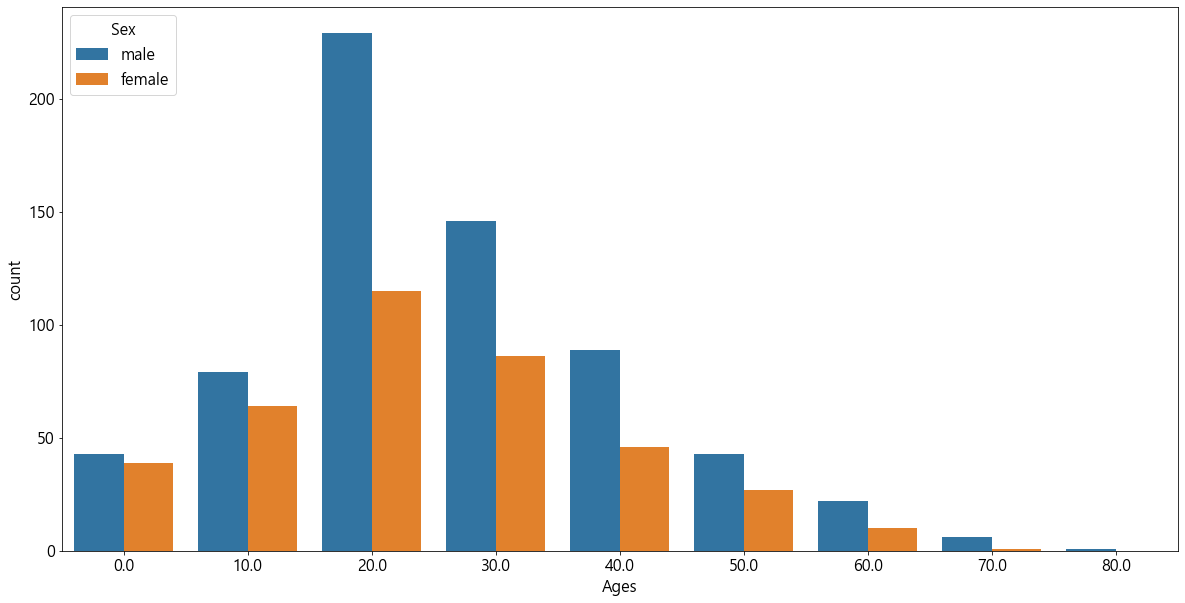

In [26]:
# Ages와 Sex간의 관계
sns.countplot(data=total_df, x='Ages', hue='Sex')
plt.show()

- 모든 연령대에서 남성이 수가 많다. 
- 20대가 가장 많다.

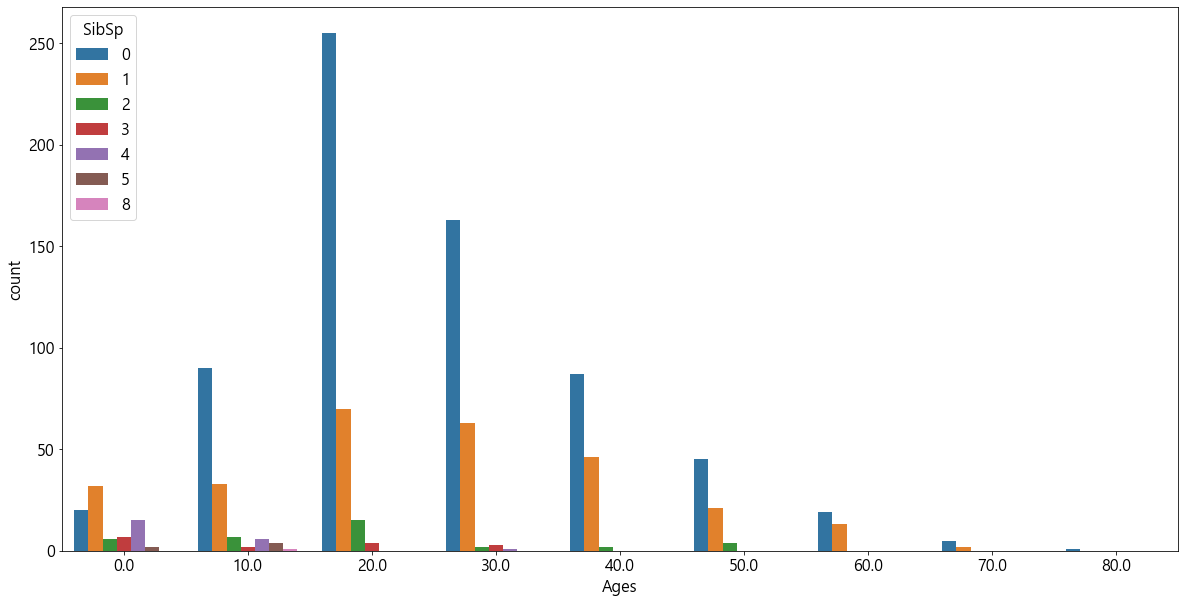

In [27]:
# Ages와 SibSp간의 관계
sns.countplot(data=total_df, x='Ages', hue='SibSp')
plt.show()

- 0살대는 1명이 많고 나머지는 0명이 많다.

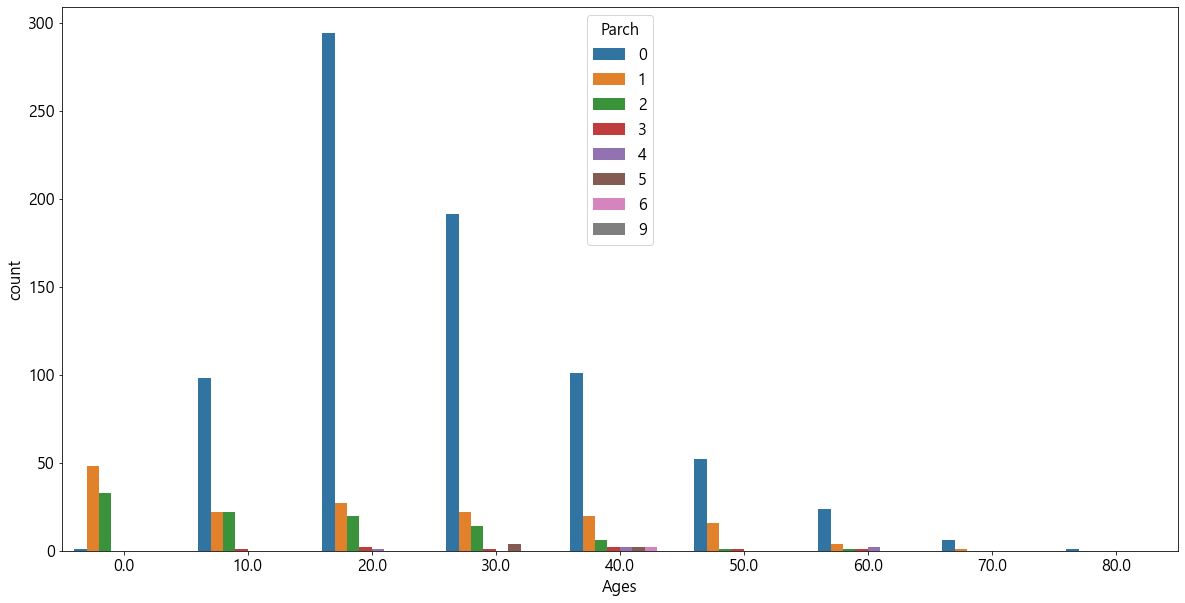

In [28]:
# Ages와 Parch간의 관계
sns.countplot(data=total_df, x='Ages', hue='Parch')
plt.show()

- 0세는 1, 2명이 가장많고 나머지는 0명이 많다.
- 1명 이상은 대부분 비슷한 수준을 보이지만 0명인 경우 20대가 월등히 많다.

In [29]:
# Age와 Fare, Survived를 추출한다.
a1 = total_df[['Age', 'Fare', 'Survived']]
a1

,Age,Fare,Survived
0,22.0,7.2500,0.0
1,38.0,71.2833,1.0
2,26.0,7.9250,1.0
3,35.0,53.1000,1.0
4,35.0,8.0500,0.0
...,...,...,...
1304,NaN,8.0500,NaN
1305,39.0,108.9000,NaN
1306,38.5,7.2500,NaN
1307,NaN,8.0500,NaN


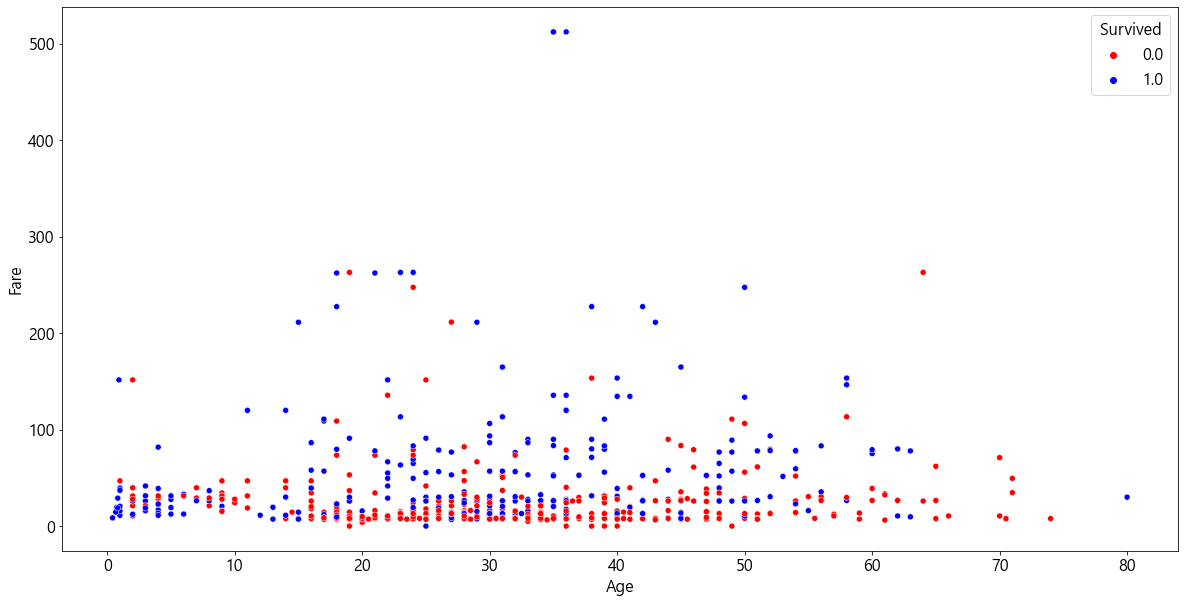

In [30]:
sns.scatterplot(data=total_df, x='Age', y='Fare', hue='Survived', palette=['r', 'b'])
plt.show()

- 나이에 관계없이 요금이 낮으면 사망확률이 높고 요금이 높으면 생존확률이 높다.

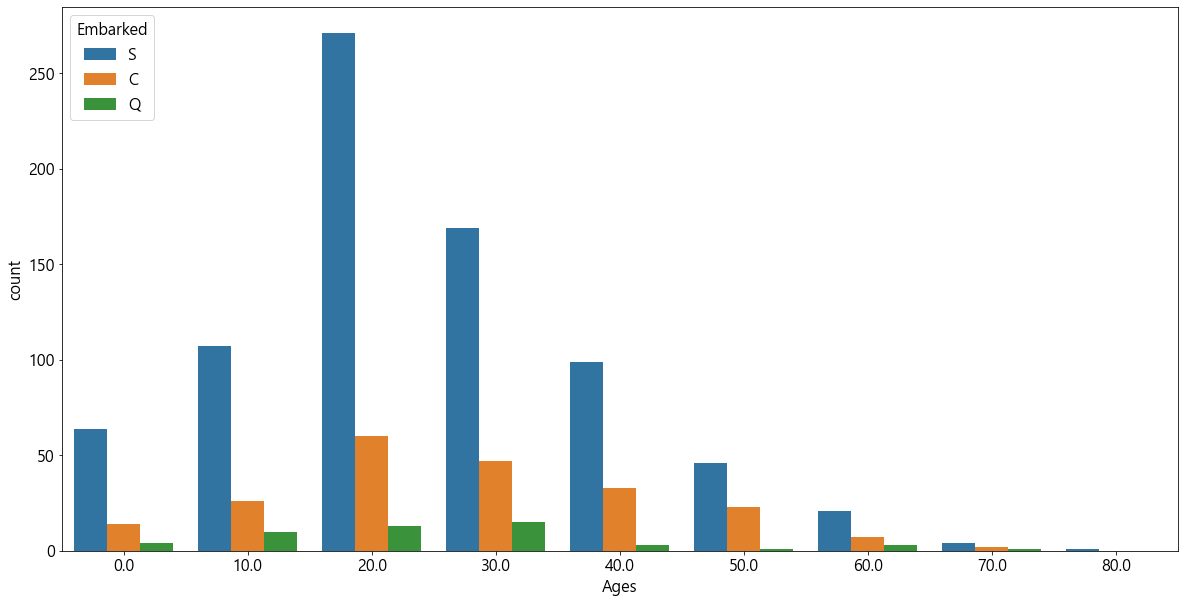

In [31]:
# Ages와 Embarked와의 관계를 확인한다.
sns.countplot(data=total_df, x='Ages', hue='Embarked')
plt.show()

- 선착장은 나이대와 무관하게 모든 연령대가 비슷한 비율을 보이고 있다.

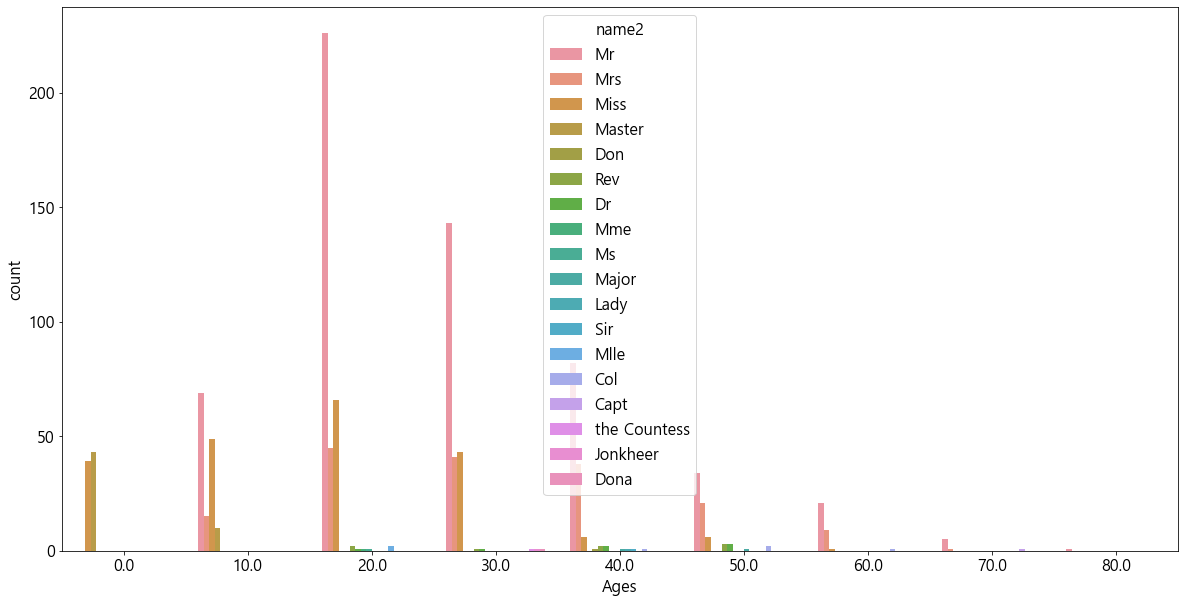

In [32]:
# Ages와 Name2와의 관계를 확인한다.
sns.countplot(data=total_df, x='Ages', hue='name2')
plt.show()

In [33]:
# 3등석 중에 연령대가 결측치인 사람들을 확인한다.
a1 = total_df.query('Pclass == 3')
a2 = a1[a1['Ages'].isna()]
len(a2)

208

In [34]:
# 1등석 중에 연령대가 결측치인 사람들을 확인한다.
a1 = total_df.query('Pclass == 1')
a2 = a1[a1['Ages'].isna()]
len(a2)

39

In [35]:
# Name2를 기준으로 그룹을 묶어 각 그룹별 평균을 구해 그것을 기준으로 채워준다.
a1 = total_df.groupby('name2')['Age'].mean().astype('int64')
a1

name2
Capt            70
Col             54
Don             40
Dona            39
Dr              43
Jonkheer        38
Lady            48
Major           48
Master           5
Miss            21
Mlle            24
Mme             24
Mr              32
Mrs             36
Ms              28
Rev             41
Sir             49
the Countess    33
Name: Age, dtype: int64

In [36]:
# name2 별로 결측치를 채워준다.
for a2 in a1.index :
    # 현재 name2의 값을 가져온다.
    a3 = a1[a2]
    
    # 현재 name2에 해당하는 데이터를 가져온다.
    a4 = total_df.query('name2 == @a2')
    # 이 중 결측치인 데이터의 index를 가져온다.
    a5 = a4[a4['Age'].isna()].index
    # 여기에 값을 채워준다.
    total_df.loc[a5, 'Age'] = a3
    
total_df['Age'].isna().sum()

0

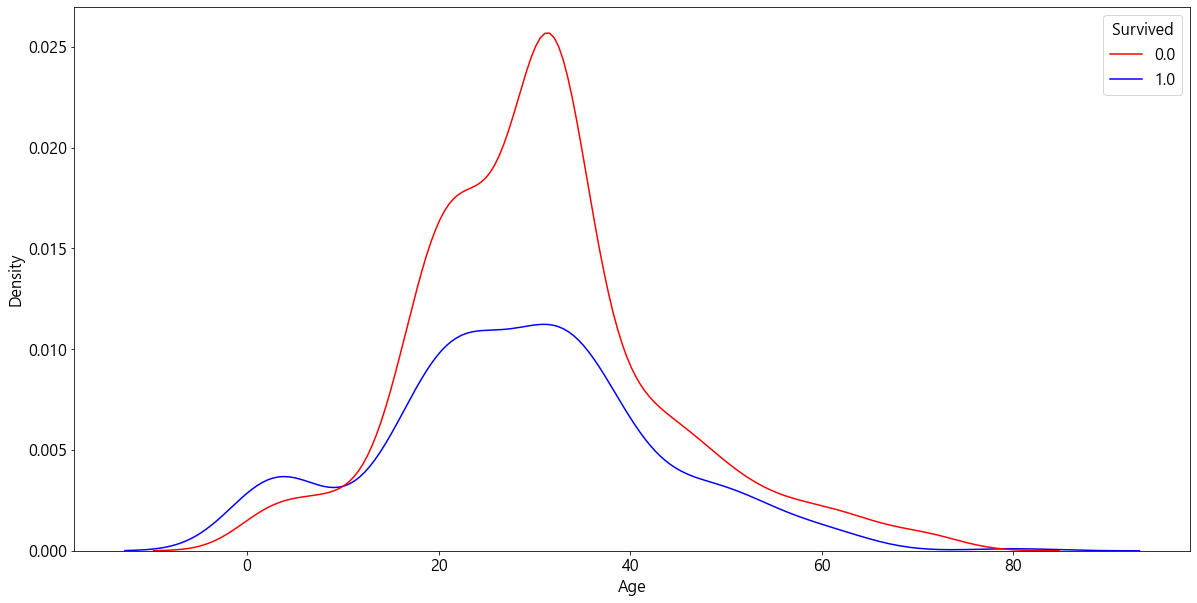

In [37]:
# 나이와 결과데이터와의 관계를
sns.kdeplot(data=total_df, x='Age', hue='Survived', palette=['r', 'b'])
plt.show()

- 영유아의 생존확률이 높다.

### SibSp
- 동승한 형제 자매 수

In [38]:
total_df['SibSp'].isna().sum()

0

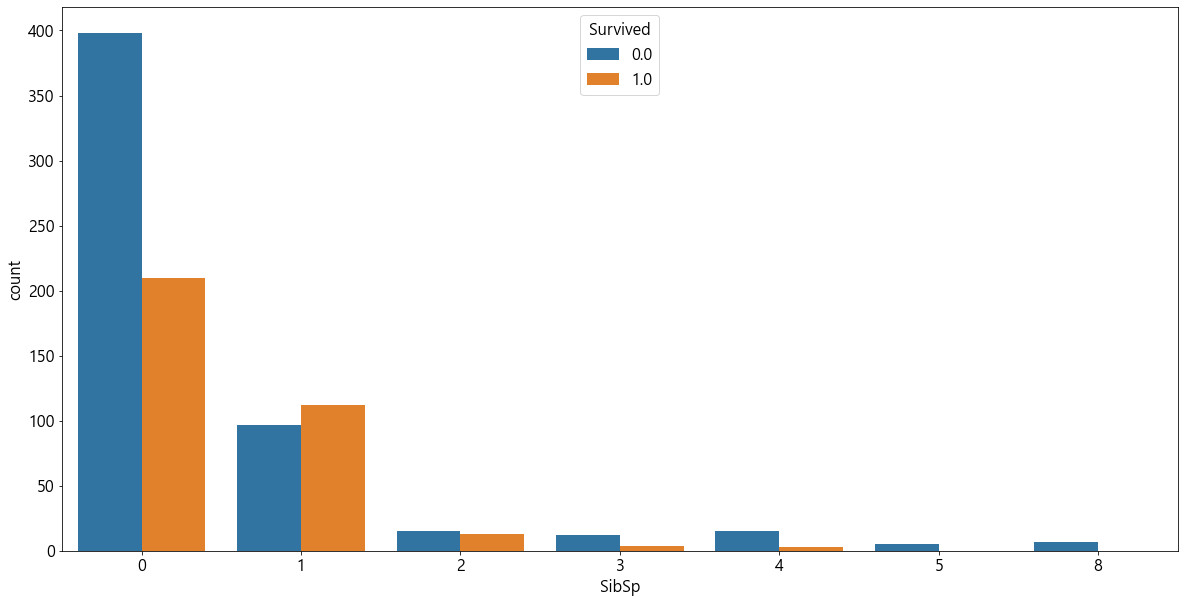

In [39]:
# 결과 데이터와의 관계를 확인한다.
sns.countplot(data=total_df, x='SibSp', hue='Survived')
plt.show()

- 동승한 승객의 수에 따라 사망 생존 비율이 다르다.

### Parch
- 동승한 부모 자식 수

In [40]:
total_df['Parch'].isna().sum()

0

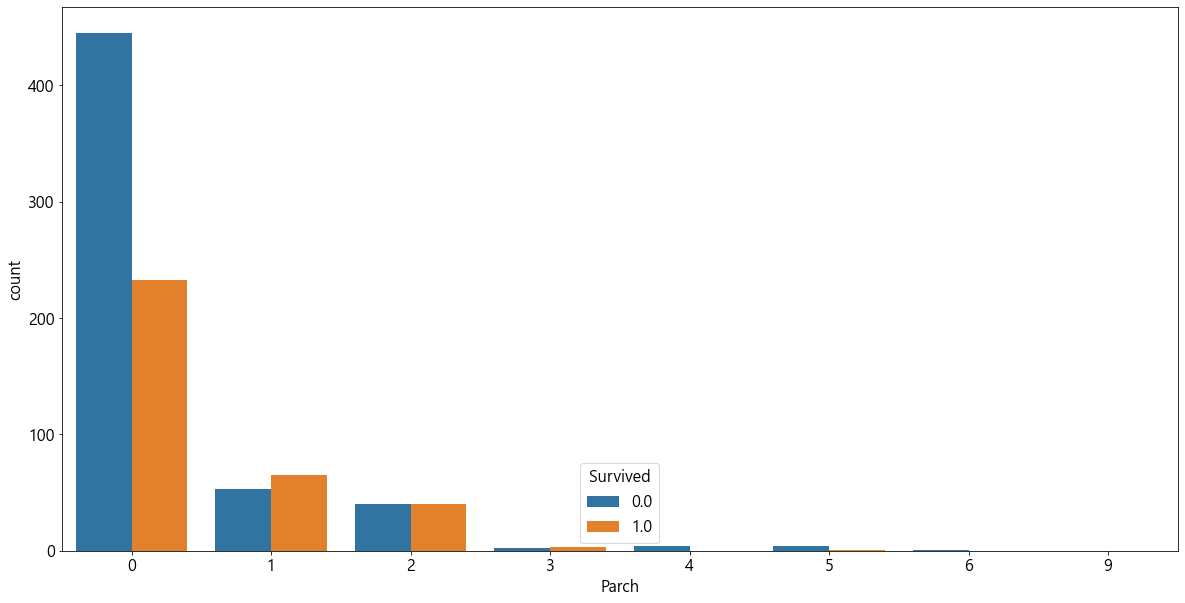

In [41]:
# 결과와의 관계를 확인한다.
sns.countplot(data=total_df, x='Parch', hue='Survived')
plt.show()

- 동승한 부모 자식수에 따라 사망 생존 비율이 달라진다.

### Ticket
- 승객들의 티켓 번호

In [42]:
# 결측치 확인
total_df['Ticket'].isna().sum()

0

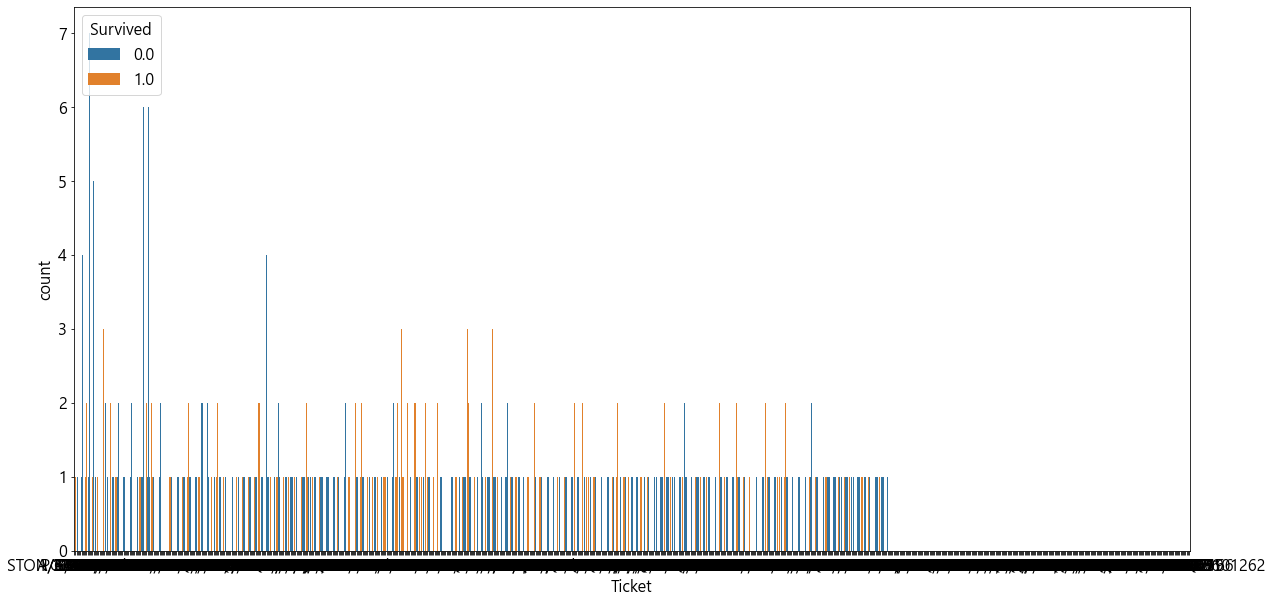

In [43]:
# 결과와의 관계를 확인한다
sns.countplot(data=total_df, x='Ticket', hue='Survived')
plt.show()

- 티켓 번호에 따라 사망 생존률이 다르다.

### Fare
- 요금

In [44]:
# 결측치 확인
total_df['Fare'].isna().sum()

1

In [45]:
# 결측치가 1개 이므로 평균을 구해 채워준다.
a1 = total_df['Fare'].mean()
total_df['Fare'].fillna(a1, inplace=True)
total_df['Fare'].isna().sum()

0

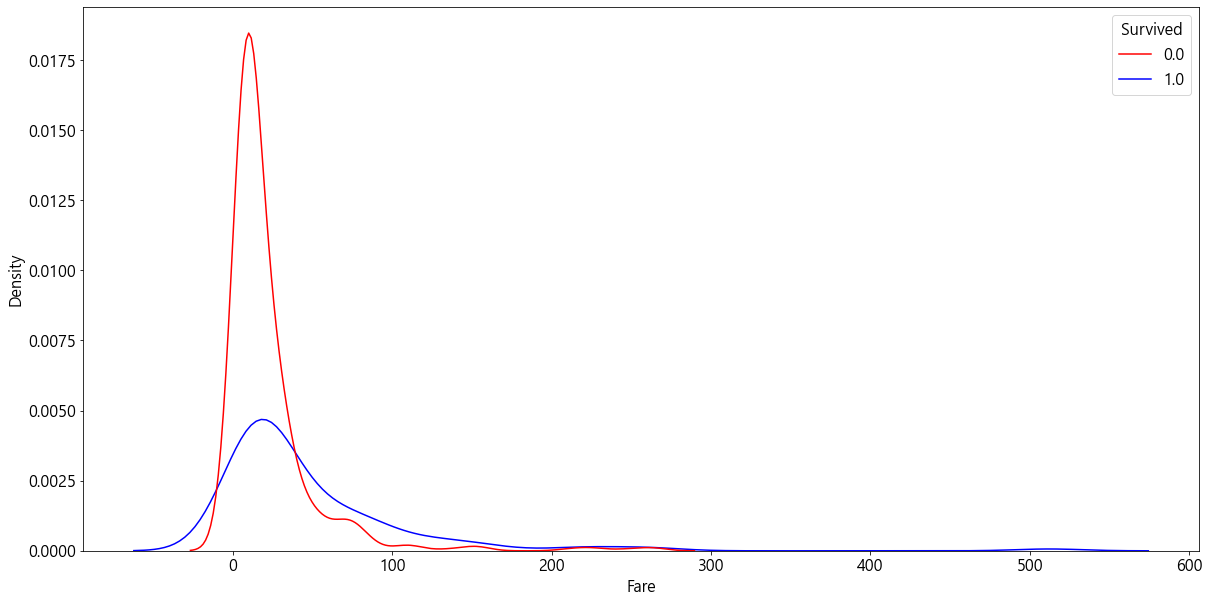

In [46]:
# 요금과 결과의 관계를 확인한다.
sns.kdeplot(data=total_df, x='Fare', hue='Survived', palette=['r', 'b'])
plt.show()

- 요금이 낮으면 사망확률이 매우 높아진다.

### Cabin
- 객실

In [47]:
# 결측치 확인
total_df['Cabin'].isna().sum()

1014

In [48]:
# 결측치 비율이 너무 높기 때문에 이 컬럼은 제거한다.
total_df.drop('Cabin', axis=1, inplace=True)
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName,Ages
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris,20.0
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),30.0
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,20.0
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),30.0
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.0,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf,NaN
1305,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina,30.0
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen,30.0
1307,NaN,3,male,32.0,0,0,359309,8.0500,S,Ware,Mr,Frederick,NaN


### Embarked
- 탑승한 선착장

In [49]:
# 결측치 확인
total_df['Embarked'].isna().sum()

2

In [50]:
# 값의 개수를 확인한다.
total_df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [51]:
# 결측치 수가 매우 적으므로 가장 많은 것으로 채워준다.
total_df['Embarked'].fillna('S', inplace=True)
total_df['Embarked'].isna().sum()

0

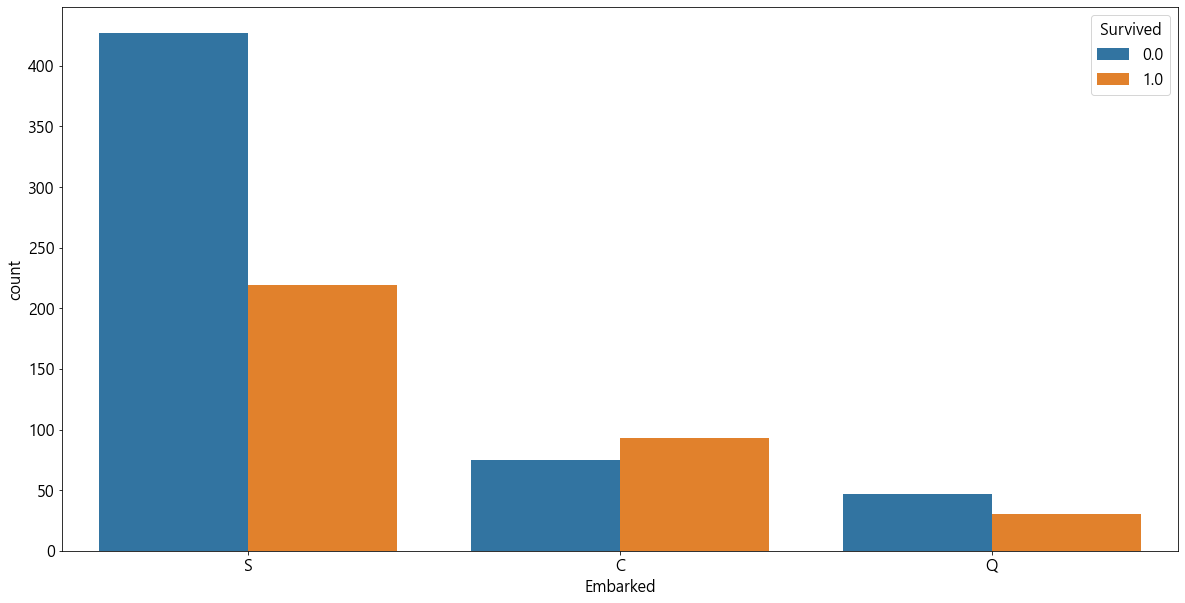

In [52]:
# 결과 데이터와의 관계를 확인한다.
sns.countplot(data=total_df, x='Embarked', hue='Survived')
plt.show()

- S 에서 탑승한 승객들은 사망확률이 매우 높다.

### 처리 결과 확인

In [53]:
total_df.isna().sum()

Survived     418
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
LastName       0
name2          0
FirstName      0
Ages         263
dtype: int64

In [54]:
# Ages 컬럼은 삭제
total_df.drop('Ages', inplace=True, axis=1)
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.0,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf
1305,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen
1307,NaN,3,male,32.0,0,0,359309,8.0500,S,Ware,Mr,Frederick


In [55]:
# 학습과 예측으로 나눈다.
a1 = len(df1)

train = total_df[:a1]
test = total_df[a1:]

test.drop('Survived', axis=1, inplace=True)

train.to_csv('data/titanic_train2.csv', index=False)
test.to_csv('data/titanic_test2.csv', index=False)

In [56]:
train['Survived'].isna().sum()

0